In [4]:
from PIL import Image
import numpy as np
import os

img = Image.open(r'C:\Users\mtenenba\Desktop\prusa_binary\slice_images\cube00190.png').convert("L")
arr = np.array(img)

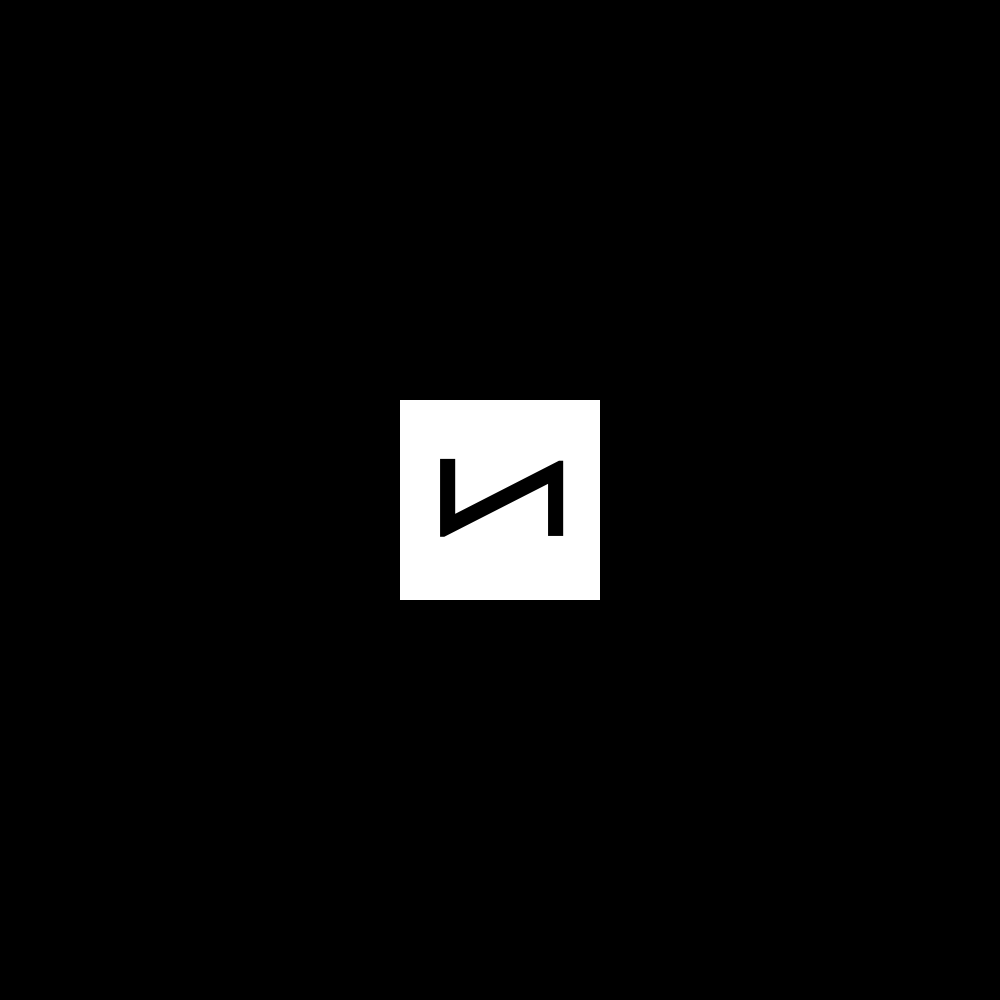

In [5]:
img

In [6]:
arr.shape

(1000, 1000)

In [7]:
threshold = 128
binary = (arr > threshold).astype(np.uint8)

In [8]:
line_waveform = binary[500, :]

In [9]:
line_waveform

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
def load_images_as_bidirectional_waveform(image_dir, threshold=128, reverse_every_other=True):
    waveforms = []

    image_files = sorted([
        f for f in os.listdir(image_dir)
        if f.endswith(".png")
    ])

    for i, filename in enumerate(image_files):
        path = os.path.join(image_dir, filename)
        img = Image.open(path).convert("L")  # grayscale
        binary = (np.array(img) > threshold).astype(np.uint8)

        # Loop over rows
        for row_index in range(binary.shape[0]):
            row = binary[row_index]
            # Flip row direction every other row for serpentine scan
            if reverse_every_other and ((i % 2 == 0 and row_index % 2 == 1) or
                                        (i % 2 == 1 and row_index % 2 == 0)):
                row = row[::-1]
            waveforms.append(row)

    full_waveform = np.concatenate(waveforms)
    return full_waveform

In [11]:
test_cube_waveform = load_images_as_bidirectional_waveform('slice_images')

In [12]:
len(test_cube_waveform)/4

50000000.0

In [13]:
float_waveform = test_cube_waveform.astype(np.float64)

quarter_float_waveform = test_cube_waveform[:50000000].astype(np.float64) * 2 - 1

In [14]:
float_waveform.tofile("full_float64.bin")

In [15]:
quarter_float_waveform.astype('<f8').tofile("quarter_float64_little_endian.bin")